In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import cumtrapz
from scipy.signal import detrend
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [40]:

def integrar(path, time1, muestreo):
    output_filename=rf"C:\Users\chelo\Documents\Vibras laboratorio 3\Pos vs tiempo {muestreo} Hz (de muestreo).csv"

    # Cargar los datos desde el archivo CSV
    data = pd.read_csv(path, sep=",", names=["tiempo", "aceleracion"],header=1)

    # Filtrar datos hasta el tiempo especificado
    data = data[data["tiempo"] <= time1]


    # Convertir aceleración de g a m/s²
    data["aceleracion"] *= 9.81
    
    # Graficar la aceleración para verificar su forma
    plt.figure()
    plt.plot(data["tiempo"], data["aceleracion"], label="Aceleración (m/s²)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Aceleración (m/s²)")
    #plt.title("Aceleración en función del tiempo")
    plt.legend()
    plt.show()

    # Integrar la aceleración para obtener la velocidad
    velocidad = cumtrapz(data["aceleracion"], data["tiempo"], initial=0)

    # Integrar la velocidad para obtener la posición
    posicion = cumtrapz(velocidad, data["tiempo"], initial=0)
    posicion = detrend(posicion)

    # Ajustar el tamaño del DataFrame para que coincida con las longitudes de 'velocidad' y 'posicion'
    data = data.iloc[:len(velocidad)]

    # Agregar las columnas de velocidad y posición al DataFrame
    data["velocidad"] = velocidad
    data["posicion"] = posicion

    # Crear una nueva columna con "tiempo" y "posicion" combinados, separados por un espacio
    data["tiempo_posicion"] = data["tiempo"].astype(str) + "," + data["posicion"].astype(str)

    # Guardar solo la columna combinada en el archivo CSV especificado
    data[["tiempo_posicion"]].to_csv(output_filename, index=False, header=False)

    # Graficar posición vs tiempo
    plt.figure()
    plt.plot(data["tiempo"], data["posicion"], label="Posición (m)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Posición (m)")
    #plt.title("Posición vs. Tiempo")
    plt.legend()
    plt.show()

    return data["posicion"]



In [28]:
def integrar_forzado(path,forzamiento, time1):
    output_filename=rf"c:\Users\chelo\Documents\Vibras laboratorio 3\Forzado\Pos vs tiempo (forzado) {forzamiento} Hz (de muestreo).csv"
    # Cargar los datos desde el archivo CSV
    data = pd.read_csv(path, sep="\t", names=["tiempo", "aceleracion"],header=1)
    # Filtrar datos hasta el tiempo especificado
    data = data[data["tiempo"] <= time1]

    # Convertir aceleración de g a m/s²
    data["aceleracion"] *= 9.81
    
    # Graficar la aceleración para verificar su forma
    plt.figure()
    plt.plot(data["tiempo"], data["aceleracion"], label="Aceleración (m/s²)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Aceleración (m/s²)")
    #plt.title("Aceleración en función del tiempo")
    plt.legend()
    plt.show()

    # Integrar la aceleración para obtener la velocidad
    velocidad = cumtrapz(data["aceleracion"], data["tiempo"], initial=0)

    # Integrar la velocidad para obtener la posición
    posicion = cumtrapz(velocidad, data["tiempo"], initial=0)
    posicion = detrend(posicion)

    # Ajustar el tamaño del DataFrame para que coincida con las longitudes de 'velocidad' y 'posicion'
    data = data.iloc[:len(velocidad)]

    # Agregar las columnas de velocidad y posición al DataFrame
    data["velocidad"] = velocidad
    data["posicion"] = posicion

    # Crear una nueva columna con "tiempo" y "posicion" combinados, separados por un espacio
    data["tiempo_posicion"] = data["tiempo"].astype(str) + "," + data["posicion"].astype(str)

    # Guardar solo la columna combinada en el archivo CSV especificado
    data[["tiempo_posicion"]].to_csv(output_filename, index=False, header=False)

    # Graficar posición vs tiempo
    plt.figure()
    plt.plot(data["tiempo"], data["posicion"], label="Posición (m)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Posición (m)")
    #plt.title("Posición vs. Tiempo")
    plt.legend()
    plt.show()

    return data["posicion"]

# Llama a la función con el archivo adecuado, tiempo de corte y nombre de salida

def ajuste_func1(t, A, frecuencia, phi):
        omega = 2 * np.pi * frecuencia
        return A *np.sin(omega * t + phi)
def ajuste_func2(t, A, B, frecuencia, phi):
        omega = 2 * np.pi * frecuencia
        return A * np.exp(-B * t) * np.sin(omega * t + phi)



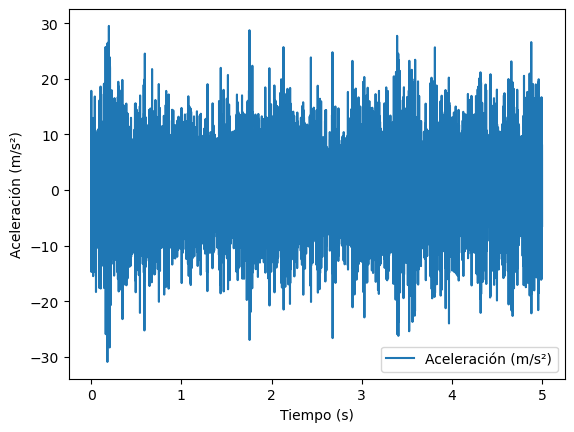

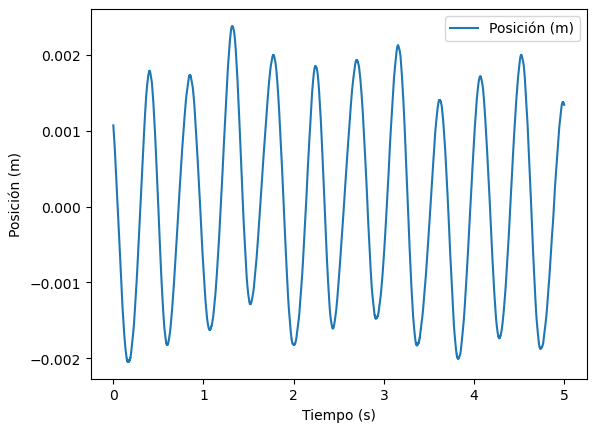

0        0.001071
1        0.001062
2        0.001054
3        0.001048
4        0.001042
           ...   
12794    0.001345
12795    0.001343
12796    0.001341
12797    0.001341
12798    0.001341
Name: posicion, Length: 12799, dtype: float64

In [41]:
integrar(r"C:\Users\chelo\Downloads\Datos_L3 (1)\pt1\DataRecor2.csv",5,10)

In [36]:

def encontrarX(path, time1):
    # Cargar los datos desde el archivo CSV
    data = pd.read_csv(path, sep=" ", names=["tiempo", "posición"], header=1)

    # Datos de tiempo y posición filtrados
    tiempo = data["tiempo"].values
    posicion = data["posición"].values
    # Filtrar datos hasta el tiempo especificado
    data = data[data["tiempo"] <= time1]

     # Definir la función de ajuste incluyendo la frecuencia como parámetro
    def ajuste_func(t, A, B, frecuencia, phi):
        omega = 2 * np.pi * frecuencia
        return A * np.exp(-B * t) * np.sin(omega * t + phi)

    # Realizar el ajuste, especificando 4.7 como semilla para la frecuencia
    params, _ = curve_fit(ajuste_func, tiempo, posicion, p0=[1, 0.1, 4.7, 0])

    # Obtener los parámetros ajustados
    A, B, frecuencia, phi = params
    print(f"A = {A}, B = {B}, frecuencia = {frecuencia}, phi = {phi}")

    # Generar la función ajustada en el intervalo de tiempo
    tiempo_ajustado = np.linspace(0, time1, 1000)
    posicion_ajustada = ajuste_func(tiempo_ajustado, A, B, frecuencia, phi)

    # Encontrar todos los picos
    picos, _ = find_peaks(posicion_ajustada)
    

    # Obtener los tiempos y valores de todos los picos
    tiempos_picos = tiempo_ajustado[picos]
    valores_picos = posicion_ajustada[picos]

    promedio_peaks = np.mean(valores_picos)
    print("Promedio de peaks:", promedio_peaks)
    # Graficar los datos, el ajuste y los picos
    plt.plot(data["tiempo"], data["posición"], 'b-', label="Datos sin filtrar")
    plt.plot(tiempo_ajustado, posicion_ajustada, 'r--', label=f"Ajuste hasta {time1}s")
    plt.plot(tiempos_picos, valores_picos, 'go', label="Picos")
    plt.xlabel("Tiempo")
    plt.ylabel("Posición")
    plt.legend()
    plt.show()




    

In [37]:

encontrarX(r"C:\Users\chelo\Documents\Vibras Laboratorio 3\Pos vs tiempo 10 Hz (de muestreo).csv",5)

ParserError: Too many columns specified: expected 2 and found 1

In [ ]:
def encontrarX(path, time1):
    # Cargar los datos desde el archivo CSV
    data = pd.read_csv(path, sep=",", names=["tiempo", "posición"], skiprow==1)

    # Convertir las columnas a valores numéricos
    data["tiempo"] = pd.to_numeric(data["tiempo"], errors='coerce')
    data["posición"] = pd.to_numeric(data["posición"], errors='coerce')

    # Eliminar filas con valores no numéricos
    data = data.dropna()

    # Filtrar datos hasta el tiempo especificado
    data = data[data["tiempo"] <= time1]

    # Datos de tiempo y posición
    tiempo = data["tiempo"].values
    posicion = data["posición"].values

    # Definir la función de ajuste
    def ajuste_func(t, A, B, frecuencia, phi):
        omega = 2 * np.pi * frecuencia
        return A * np.exp(-B * t) * np.sin(omega * t + phi)

    # Realizar el ajuste
    params, _ = curve_fit(ajuste_func, tiempo, posicion, p0=[1, 0.1, 4.7, 0])

    # Obtener los parámetros ajustados
    A, B, frecuencia, phi = params
    print(f"A = {A}, B = {B}, frecuencia = {frecuencia}, phi = {phi}")

    # Generar la función ajustada
    tiempo_ajustado = np.linspace(0, time1, 1000)
    posicion_ajustada = ajuste_func(tiempo_ajustado, A, B, frecuencia, phi)

    # Encontrar los picos
    picos, _ = find_peaks(posicion_ajustada)

    # Obtener los tiempos y valores de los picos
    tiempos_picos = tiempo_ajustado[picos]
    valores_picos = posicion_ajustada[picos]

    promedio_peaks = np.mean(valores_picos)
    print("Promedio de peaks:", promedio_peaks)

    # Graficar los resultados
    plt.plot(data["tiempo"], data["posición"], 'b-', label="Datos sin filtrar")
    plt.plot(tiempo_ajustado, posicion_ajustada, 'r--', label=f"Ajuste hasta {time1}s")
    plt.plot(tiempos_picos, valores_picos, 'go', label="Picos")
    plt.xlabel("Tiempo")
    plt.ylabel("Posición")
    plt.legend()
    plt.show()


In [43]:
encontrarX(r"C:\Users\chelo\Documents\Vibras Laboratorio 3\Pos vs tiempo 10 Hz (de muestreo).csv",5)

ParserError: Too many columns specified: expected 2 and found 1

In [44]:
import pandas as pd

def inspeccionar_archivo(path):
    # Leer las primeras filas del archivo
    try:
        data = pd.read_csv(path)
        print(data.head())  # Mostrar las primeras filas del archivo
    except Exception as e:
        print("Error al leer el archivo:", e)

# Llamar a la función
inspeccionar_archivo(r"C:\Users\chelo\Documents\Vibras Laboratorio 3\Pos vs tiempo 10 Hz (de muestreo).csv")


   0.00039062501,0.0010706217988924987
0  0.00078125001,0.0010620851062181516
1     0.001171875,0.001054441608556888
2       0.0015625,0.001047693901880703
3    0.001953125,0.0010422845407200693
4     0.00234375,0.0010373589379312235
